<a href="https://colab.research.google.com/github/adnaen/machine-learning-notes/blob/main/llm/transformers/encoder/encoder_block.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LET'S CREATE AN ENCODER FROM SCRATCH**

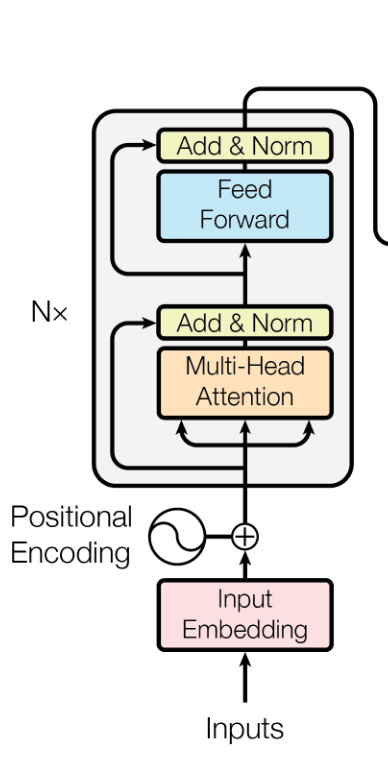

In [2]:
import torch

## **Dummy Input Data**

In [18]:
D_MODEL: int = 20

ip_embedding = torch.randn((5, D_MODEL))  # 5 tokens, each tokens embedded into (1, 20) shaped vector
ip_embedding

tensor([[ 1.1714,  0.3347,  1.9409,  0.8663, -0.1829,  2.1855,  1.4912,  1.8652,
          0.6279, -0.7542, -0.9493, -0.8849,  2.0987,  1.0945,  0.6236,  0.3389,
          0.3586,  0.1604, -0.9690, -0.0977],
        [-1.3877, -0.3061,  0.5800, -0.0058,  0.4723,  0.1374,  0.1151, -0.3149,
         -1.1122, -0.7111, -1.3272, -0.3752,  0.2906, -0.8883,  1.1742, -0.6647,
         -1.3688, -0.1685,  1.8485,  1.0331],
        [-0.8841,  1.4461,  0.0563, -0.7451,  0.2553,  1.1859, -1.7326, -0.0923,
          0.2007,  0.4709,  0.1068,  1.7125,  0.3884, -0.0208,  0.2932,  2.2139,
          0.7661, -0.4569, -1.0173, -0.5794],
        [-0.2525, -1.2745, -1.2160, -0.0280, -1.4342, -0.4495,  0.8822, -0.2882,
         -1.7751, -0.8814,  0.3429,  0.1713, -1.5324, -0.7293, -2.8548,  1.6513,
          0.0452, -0.1796,  1.4899,  0.3585],
        [ 0.4623, -0.2838, -1.6450,  0.0706, -0.3951,  0.9823,  0.7897, -0.2485,
          2.2335,  0.8531, -0.7318,  1.4490, -0.7647, -0.5348,  0.9829, -0.8155,
      

## **POSITIONAL ENCODER**

In [4]:
def positional_encoding(x: torch.Tensor) -> torch.Tensor:
    seq_len, d_model = x.shape
    result: list[float] = []
    for pos, vec in enumerate(x):
        each = []
        for i, _ in enumerate(vec):
            if i % 2 == 0:
                # sin(pos / 10000 ^ (2i / d_model))
                res = pos / torch.pow(
                    torch.tensor(10000), torch.tensor((2*i / d_model))
                    )
                each.append(torch.sin(res))

            else:
                # cos(pos / 10000 ^ (2i / d_model))
                res = pos / torch.pow(
                    torch.tensor(10000), torch.tensor((2*i / d_model))
                    )
                each.append(torch.cos(res))
        result.append(each)
    return torch.tensor(result).reshape(-1, 20)

In [5]:
out = positional_encoding(ip_embedding)
out

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
          0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  9.2180e-01,  1.5783e-01,  9.9801e-01,  2.5116e-02,
          9.9995e-01,  3.9811e-03,  1.0000e+00,  6.3096e-04,  1.0000e+00,
          1.0000e-04,  1.0000e+00,  1.5849e-05,  1.0000e+00,  2.5119e-06,
          1.0000e+00,  3.9811e-07,  1.0000e+00,  6.3096e-08,  1.0000e+00],
        [ 9.0930e-01,  6.9942e-01,  3.1170e-01,  9.9205e-01,  5.0217e-02,
          9.9980e-01,  7.9621e-03,  9.9999e-01,  1.2619e-03,  1.0000e+00,
          2.0000e-04,  1.0000e+00,  3.1698e-05,  1.0000e+00,  5.0238e-06,
          1.0000e+00,  7.9621e-07,  1.0000e+00,  1.2619e-07,  1.0000e+00],
        [ 1.4112e-01,  3.6764e-01,  4.5775e-01,  9.8214e-01,  7.5285e-02,
          9.9955e-01,  1.1943e-02, 

In [6]:
# add positional encoding

pe_input = ip_embedding + out
pe_input

tensor([[ 0.0681,  0.7126,  0.7692,  0.6997, -1.2661,  2.2521,  1.7900,  0.7789,
          0.2213,  1.4279, -0.4771,  2.0554, -0.0832,  1.0683,  0.2591,  0.2956,
          0.1267,  0.3992,  0.0034,  1.4040],
        [ 0.4293,  1.6272, -0.6693,  0.5609, -0.2391,  0.8770,  1.3121,  1.9103,
         -0.2847,  2.0482, -0.2528,  0.0483, -0.0188, -0.5830,  0.2284,  1.6607,
         -0.1939,  1.6838, -0.8395,  2.5093],
        [ 1.7248,  0.7241, -0.7153,  0.8349,  1.5163,  3.2503, -0.3269,  0.0425,
         -0.7713,  0.4172, -1.1295,  1.3081,  0.2427,  1.9148,  0.6626,  0.7228,
         -0.2097, -0.9043, -0.7149,  2.5330],
        [ 1.6990, -0.5538,  0.4892,  0.5351,  0.3708,  1.2709, -1.2190,  0.5543,
          1.4108,  1.2466, -0.3837,  2.3798, -0.1410,  0.5542,  0.7310,  1.5317,
          1.9772, -0.1086, -0.0103,  1.5291],
        [-1.4463, -0.4233,  0.6496,  0.9931, -0.4467,  1.6435, -1.8324,  0.7687,
         -0.4737, -1.1974, -1.6474,  1.3652,  1.3844,  2.3460, -0.2543,  0.0428,
      

## **MULTI-HEAD ATTENTION NN**

In [7]:
class MultiHeadAttention(torch.nn.Module):
    def __init__(
            self,
            d_model: int,
            seq_len: int,
            heads: int=9
        ) -> None:
        super().__init__()

        self.q_w = torch.nn.Linear(d_model, d_model)
        self.k_w = torch.nn.Linear(d_model, d_model)
        self.v_w = torch.nn.Linear(d_model, d_model)

        self.d_model = d_model
        self.no_of_heads = heads
        self.d_k = self.d_model // self.no_of_heads
        self.seq_len = seq_len

        print(
            f"INFO\n No.Of Heads: {self.no_of_heads}\n Model Dim(d_model) : {self.d_model}\n DK: {self.d_k}"
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        q_val = self.q_w(X)
        k_val = self.k_w(X)
        v_val = self.v_w(X)

        # split Q, K, V for multi-heads with shape (no_of_heads, seq_len, d_k)
        q_split = q_val.view(self.no_of_heads, self.seq_len, self.d_k)
        k_split = k_val.view(self.no_of_heads, self.seq_len, self.d_k)
        v_split = v_val.view(self.no_of_heads, self.seq_len, self.d_k)

        # calculate Attention score for each head
        attention_score = []

        for q, k, v in zip(q_split, k_split, v_split):
            attention_score.append(
                self._attention_calculation(q, k, v, self.d_k)
                )

        heads_result = torch.stack(
            attention_score, dim=0
            )  # convert the list to tensor

        merged_result = (
            heads_result.permute(1, 0, 2)
            .reshape(self.seq_len, self.d_model)
        )   # combine all heads output to single tensor --
            #  shape (seq_len, d_model) / input_size

        # THE RESULT IS NOTHING BUT,
        # CONTEXTUAL EMBEDDING OF THE INPUT EMBEDDING.
        # THIS HELP THE MODEL TO UNDERSTAND CONTEXTUAL MEANING OF WORDS.
        # SO IT SHOULD BE THE SAME SHAPE.
        return merged_result

    def _attention_calculation(
            self,
            Q: torch.Tensor,
            K: torch.Tensor,
            V: torch.Tensor,
            dk: int
        ) -> torch.Tensor:
        # Attention (Q, K, V) = softmax((Q . k^T / root of dk)) . V

        softmax_out = torch.softmax((Q @ K.T) / torch.sqrt(torch.tensor(dk)), dim=1)
        return softmax_out @ V

In [19]:
model = MultiHeadAttention(d_model=D_MODEL, heads=4, seq_len=5)

INFO
 No.Of Heads: 4
 Model Dim(d_model) : 20
 DK: 5


In [20]:
res = model(ip_embedding)
res

tensor([[-0.8795,  0.2050,  1.0417, -0.3182, -0.2424,  0.0588,  0.1184, -0.2403,
          0.1382, -0.3035,  0.2479, -0.1999, -0.2666,  0.0080,  0.0137,  0.1740,
         -0.0928,  0.1134, -0.2084,  0.4369],
        [-0.5573,  0.2697,  0.6098, -0.0489, -0.2636,  0.0770,  0.2385, -0.1306,
          0.0266, -0.3832, -0.0350, -0.2437, -0.2289,  0.1652, -0.2056,  0.2828,
         -0.1297,  0.1032, -0.0734,  0.4981],
        [-0.5344,  0.1537,  0.4611, -0.0711, -0.2905,  0.0742,  0.3222, -0.0515,
         -0.0582, -0.4043,  0.1801, -0.4027, -0.1525,  0.2277, -0.2005,  0.2712,
         -0.0937,  0.1050, -0.0922,  0.4975],
        [-0.5617,  0.2418,  0.6074, -0.0097, -0.2510,  0.0084,  0.1492, -0.1690,
          0.1199, -0.3110,  0.0623, -0.3744, -0.1473,  0.2252, -0.2361,  0.2626,
         -0.1502,  0.1664, -0.0116,  0.4271],
        [-0.7027,  0.1748,  0.7407, -0.1350, -0.2615,  0.0905,  0.2095, -0.1402,
          0.0489, -0.3535,  0.1083, -0.4384, -0.1810,  0.2660, -0.2343,  0.3829,
      

In [21]:
res.shape

torch.Size([5, 20])

## **Add & Norm**

### Add

In [22]:
# add the input embedding with attention result
added_result = pe_input + res
added_result

tensor([[-0.8114,  0.9176,  1.8109,  0.3815, -1.5085,  2.3109,  1.9084,  0.5386,
          0.3595,  1.1244, -0.2292,  1.8555, -0.3498,  1.0763,  0.2729,  0.4696,
          0.0339,  0.5126, -0.2050,  1.8409],
        [-0.1280,  1.8969, -0.0595,  0.5120, -0.5027,  0.9540,  1.5506,  1.7797,
         -0.2580,  1.6650, -0.2879, -0.1954, -0.2477, -0.4178,  0.0227,  1.9435,
         -0.3236,  1.7869, -0.9128,  3.0074],
        [ 1.1904,  0.8778, -0.2542,  0.7638,  1.2258,  3.3245, -0.0047, -0.0090,
         -0.8294,  0.0129, -0.9494,  0.9054,  0.0902,  2.1425,  0.4622,  0.9941,
         -0.3034, -0.7993, -0.8070,  3.0305],
        [ 1.1373, -0.3120,  1.0965,  0.5254,  0.1198,  1.2793, -1.0697,  0.3853,
          1.5307,  0.9356, -0.3214,  2.0055, -0.2883,  0.7794,  0.4949,  1.7944,
          1.8271,  0.0578, -0.0219,  1.9562],
        [-2.1490, -0.2485,  1.3903,  0.8581, -0.7082,  1.7340, -1.6229,  0.6285,
         -0.4248, -1.5509, -1.5391,  0.9268,  1.2035,  2.6120, -0.4886,  0.4257,
      

### Layer Norm

In [23]:
layer_norm = torch.nn.LayerNorm(normalized_shape=D_MODEL) # d_model: 20 (embedding_dim)
ln_res = layer_norm(added_result)
ln_res

tensor([[-1.4617,  0.3095,  1.2247, -0.2397, -2.1760,  1.7369,  1.3246, -0.0788,
         -0.2622,  0.5214, -0.8653,  1.2703, -0.9889,  0.4721, -0.3510, -0.1494,
         -0.5958, -0.1054, -0.8405,  1.2554],
        [-0.6573,  1.1982, -0.5945, -0.0708, -1.0006,  0.3342,  0.8809,  1.0908,
         -0.7764,  0.9857, -0.8037, -0.7190, -0.7670, -0.9228, -0.5191,  1.2409,
         -0.8365,  1.0975, -1.3764,  2.2158],
        [ 0.5381,  0.2742, -0.6818,  0.1779,  0.5680,  2.3403, -0.4711, -0.4747,
         -1.1676, -0.4562, -1.2688,  0.2974, -0.3910,  1.3421, -0.0768,  0.3723,
         -0.7233, -1.1421, -1.1487,  2.0920],
        [ 0.5134, -1.1712,  0.4660, -0.1978, -0.6693,  0.6785, -2.0519, -0.3607,
          0.9707,  0.2789, -1.1821,  1.5225, -1.1436,  0.0974, -0.2333,  1.2771,
          1.3151, -0.7413, -0.8339,  1.4652],
        [-1.7392, -0.3400,  0.8666,  0.4748, -0.6784,  1.1196, -1.3518,  0.3057,
         -0.4698, -1.2988, -1.2901,  0.5253,  0.7290,  1.7660, -0.5167,  0.1564,
      

## **PASS THROUGH FFN LAYER (2 LAYER MLP)**

In [24]:
d_ff = 4 * D_MODEL  # typicaly use this value as hidden layer in FFN

ffn = torch.nn.Sequential(
    torch.nn.Linear(D_MODEL, d_ff),
    torch.nn.ReLU(),
    torch.nn.Linear(d_ff, D_MODEL)
)

In [25]:
logits = ffn(ln_res)
logits

tensor([[ 0.1284, -0.0968,  0.0856,  0.0612, -0.0078,  0.4792, -0.0387, -0.2341,
          0.0824,  0.1130, -0.1885,  0.3480,  0.3569,  0.5035, -0.1072,  0.0404,
         -0.2678,  0.2335,  0.0637,  0.2238],
        [ 0.0006, -0.3057,  0.1589,  0.2152,  0.3943,  0.2639, -0.0449,  0.3947,
          0.0346,  0.0995, -0.2922,  0.3511, -0.0359,  0.1658,  0.2556, -0.0353,
         -0.1551,  0.1332, -0.1181,  0.0881],
        [-0.2437, -0.1783,  0.2025,  0.5453,  0.1407,  0.1566, -0.1193,  0.0060,
         -0.0064,  0.1959, -0.2494,  0.2124,  0.2412,  0.0216,  0.3597,  0.3672,
         -0.0873, -0.1272, -0.2072, -0.0521],
        [-0.1688, -0.1343,  0.3525,  0.0220, -0.0376,  0.2061,  0.0943, -0.2357,
          0.5531,  0.1380, -0.0427,  0.0476,  0.2617, -0.1828,  0.0301,  0.0127,
         -0.0229, -0.2672,  0.0918,  0.0236],
        [-0.3254, -0.4437,  0.2553,  0.1720,  0.1132,  0.5448, -0.1209,  0.2296,
          0.0823,  0.3277, -0.0824,  0.3594,  0.2169,  0.4324,  0.0602,  0.4285,
      

In [26]:
logits.shape

torch.Size([5, 20])

## **Add & Norm**

### Add

In [27]:
final_add = pe_input + logits
final_add

tensor([[ 0.1965,  0.6157,  0.8548,  0.7609, -1.2739,  2.7313,  1.7514,  0.5447,
          0.3037,  1.5409, -0.6656,  2.4034,  0.2737,  1.5718,  0.1520,  0.3361,
         -0.1411,  0.6327,  0.0671,  1.6278],
        [ 0.4299,  1.3215, -0.5104,  0.7761,  0.1552,  1.1409,  1.2672,  2.3051,
         -0.2501,  2.1477, -0.5450,  0.3994, -0.0547, -0.4172,  0.4840,  1.6254,
         -0.3491,  1.8170, -0.9576,  2.5974],
        [ 1.4811,  0.5458, -0.5128,  1.3802,  1.6570,  3.4069, -0.4462,  0.0485,
         -0.7777,  0.6132, -1.3788,  1.5204,  0.4839,  1.9364,  1.0223,  1.0900,
         -0.2970, -1.0315, -0.9221,  2.4809],
        [ 1.5302, -0.6881,  0.8417,  0.5571,  0.3332,  1.4770, -1.1246,  0.3185,
          1.9639,  1.3846, -0.4265,  2.4274,  0.1207,  0.3714,  0.7611,  1.5444,
          1.9543, -0.3758,  0.0815,  1.5527],
        [-1.7717, -0.8669,  0.9049,  1.1651, -0.3335,  2.1883, -1.9532,  0.9983,
         -0.3914, -0.8697, -1.7298,  1.7246,  1.6013,  2.7784, -0.1941,  0.4712,
      

### Layer Norm

In [28]:
norm_logits = layer_norm(final_add)
norm_logits

tensor([[-5.3953e-01, -1.0262e-01,  1.4654e-01,  4.8695e-02, -2.0719e+00,
          2.1021e+00,  1.0809e+00, -1.7661e-01, -4.2780e-01,  8.6158e-01,
         -1.4380e+00,  1.7604e+00, -4.5908e-01,  8.9379e-01, -5.8593e-01,
         -3.9407e-01, -8.9136e-01, -8.4899e-02, -6.7433e-01,  9.5208e-01],
        [-2.3154e-01,  6.3135e-01, -1.1415e+00,  1.0355e-01, -4.9738e-01,
          4.5651e-01,  5.7876e-01,  1.5832e+00, -8.8956e-01,  1.4309e+00,
         -1.1750e+00, -2.6106e-01, -7.0048e-01, -1.0513e+00, -1.7915e-01,
          9.2537e-01, -9.8533e-01,  1.1108e+00, -1.5742e+00,  1.8660e+00],
        [ 6.9324e-01, -5.5409e-02, -9.0274e-01,  6.1246e-01,  8.3400e-01,
          2.2347e+00, -8.4944e-01, -4.5350e-01, -1.1148e+00, -1.4848e-03,
         -1.5959e+00,  7.2471e-01, -1.0497e-01,  1.0577e+00,  3.2602e-01,
          3.8018e-01, -7.3005e-01, -1.3179e+00, -1.2303e+00,  1.4935e+00],
        [ 8.3929e-01, -1.4880e+00,  1.1688e-01, -1.8169e-01, -4.1651e-01,
          7.8340e-01, -1.9459e+00, 

# ***ENCODER BLOCK WORKFLOW***

# **Input Embeddings**
# **Positional Encoding**
# **Multi-Head Attention**
# **Add & Norm**
# **FFN (2 Layer MLP)**
# **Add & Norm**